In [8]:
import numpy as np
import pandas as pd

In [9]:
# Question 1 : Data Acquisition: Download the dataset from the provided link and load it into your preferred data analysis tool
crimeDataFrame = pd.read_csv('/content/drive/MyDrive/crime_data/Crime_Data_from_2020_to_Present.csv')

In [10]:
# Question 2 : Display the first few rows of the dataset
crimeDataFrame.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [11]:
#Question 2
#Check the data types of each column
crimeDataFrame.dtypes

,0
DR_NO,int64
Date Rptd,object
DATE OCC,object
TIME OCC,int64
AREA,int64
AREA NAME,object
Rpt Dist No,int64
Part 1-2,int64
Crm Cd,int64
Crm Cd Desc,object


In [12]:
# Question 2
# Review column names and descriptions, if available
print("\nColumn names:")
print(crimeDataFrame.columns)



Column names:
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [13]:
# TASK 3
# Identify missing data
print("Missing data in each column:")
missing_data = crimeDataFrame.isnull().sum()
print(missing_data)

# Handle missing data (Example: Fill numerical with mean and categorical with mode)
# Numerical columns
numerical_columns = crimeDataFrame.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    crimeDataFrame[col].fillna(crimeDataFrame[col].mean(), inplace=True)

# Categorical columns
categorical_columns = crimeDataFrame.select_dtypes(include=['object']).columns
for col in categorical_columns:
    crimeDataFrame[col].fillna(crimeDataFrame[col].mode()[0], inplace=True)

# Verify if missing data is handled
print("\nMissing data after handling:")
print(crimeDataFrame.isnull().sum())


Missing data in each column:
DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           142776
Vict Age               0
Vict Sex          136003
Vict Descent      136013
Premis Cd             14
Premis Desc          584
Weapon Used Cd    648695
Weapon Desc       648695
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          905717
Crm Cd 3          972168
Crm Cd 4          974413
LOCATION               0
Cross Street      823461
LAT                    0
LON                    0
dtype: int64


<ipython-input-13-27291cd48f01>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crimeDataFrame[col].fillna(crimeDataFrame[col].mean(), inplace=True)
<ipython-input-13-27291cd48f01>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in


Missing data after handling:
DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64


In [14]:
# Question 3
# Check for and remove duplicate rows
duplicate_rows = crimeDataFrame[crimeDataFrame.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows.")
#Looking for duplicate rows in the dataset

No duplicate rows.


In [15]:
# Question 3
# Convert data types if needed (e.g., dates to date format, numerical values to appropriate numeric types)
crimeDataFrame['Date Rptd'] = pd.to_datetime(crimeDataFrame['Date Rptd'])
crimeDataFrame['DATE OCC'] = pd.to_datetime(crimeDataFrame['DATE OCC'])
crimeDataFrame.dtypes

<ipython-input-15-bf66247c5528>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimeDataFrame['Date Rptd'] = pd.to_datetime(crimeDataFrame['Date Rptd'])
<ipython-input-15-bf66247c5528>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimeDataFrame['DATE OCC'] = pd.to_datetime(crimeDataFrame['DATE OCC'])


,0
DR_NO,int64
Date Rptd,datetime64[ns]
DATE OCC,datetime64[ns]
TIME OCC,int64
AREA,int64
AREA NAME,object
Rpt Dist No,int64
Part 1-2,int64
Crm Cd,int64
Crm Cd Desc,object


In [16]:
# Question 3
# Deal with outliers if relevant to your analysis
from scipy import stats
z_scores_Age = stats.zscore(crimeDataFrame['Vict Age'])
threshold = 3 # because data is normally distributed
outliers = crimeDataFrame[abs(z_scores_Age) > threshold]

In [17]:
print(outliers)

            DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA   AREA NAME  \
2587    200205356 2020-01-28 2020-01-28      1545     2     Rampart   
2652    201915835 2020-10-18 2020-09-13      1500    19     Mission   
2719    201611517 2020-07-28 2020-07-28       930    16    Foothill   
4472    201416561 2020-08-29 2020-08-21      1340    14     Pacific   
17628   200707523 2020-03-16 2020-03-16      1700     7    Wilshire   
...           ...        ...        ...       ...   ...         ...   
962481  240909709 2024-06-12 2024-06-06      1242     9    Van Nuys   
966998  241708362 2024-04-15 2024-04-15       810    17  Devonshire   
967291  240706194 2024-02-21 2024-02-21      1730     7    Wilshire   
968207  240507367 2024-03-29 2024-03-29       420     5      Harbor   
974414  240308553 2024-03-22 2024-03-20      1700     3   Southwest   

        Rpt Dist No  Part 1-2  Crm Cd  \
2587            245         1     480   
2652           1917         2     662   
2719           1601     

In [18]:
outlier_indices = abs(z_scores_Age) > threshold
crimeDataFrame = crimeDataFrame[~outlier_indices]
#removing the outliers from the dataframe

In [19]:
crimeDataFrame.shape

(973886, 28)

In [20]:
csv_file_path = '/content/drive/MyDrive/crime_data/Crime_Data_from_2020_to_Present.csv'
crimeDataFrame.to_csv(csv_file_path, index=False)

In [21]:
crimeData_cleaned = pd.read_csv('/content/drive/MyDrive/crime_data/Crime_Data_from_2020_to_Present.csv')

In [22]:
clean_crimeDataFrame = pd.DataFrame(crimeDataFrame)
clean_crimeDataFrame

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.000000,984.192724,991.21875,1900 S LONGWOOD AV,BROADWAY,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.000000,984.192724,991.21875,1000 S FLOWER ST,BROADWAY,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,958.139311,984.192724,991.21875,1400 W 37TH ST,BROADWAY,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,958.139311,984.192724,991.21875,14000 RIVERSIDE DR,BROADWAY,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,958.139311,984.192724,991.21875,1900 TRANSIENT,BROADWAY,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974472,240710284,2024-07-24,2024-07-23,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,958.139311,984.192724,991.21875,4000 W 23RD ST,BROADWAY,34.0362,-118.3284
974473,240104953,2024-01-15,2024-01-15,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,958.139311,984.192724,991.21875,1300 W SUNSET BL,BROADWAY,34.0685,-118.2460
974474,241711348,2024-07-19,2024-07-19,757,17,Devonshire,1751,2,888,TRESPASSING,...,IC,Invest Cont,888.0,958.139311,984.192724,991.21875,10000 OLD DEPOT PLAZA RD,BROADWAY,34.2500,-118.5990
974475,240309674,2024-04-24,2024-04-24,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,958.139311,984.192724,991.21875,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [23]:
for column in clean_crimeDataFrame.columns:
    # Count the number of null values in the current column
    null_count = clean_crimeDataFrame[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null values.")

Column 'DR_NO' has 0 null values.
Column 'Date Rptd' has 0 null values.
Column 'DATE OCC' has 0 null values.
Column 'TIME OCC' has 0 null values.
Column 'AREA' has 0 null values.
Column 'AREA NAME' has 0 null values.
Column 'Rpt Dist No' has 0 null values.
Column 'Part 1-2' has 0 null values.
Column 'Crm Cd' has 0 null values.
Column 'Crm Cd Desc' has 0 null values.
Column 'Mocodes' has 0 null values.
Column 'Vict Age' has 0 null values.
Column 'Vict Sex' has 0 null values.
Column 'Vict Descent' has 0 null values.
Column 'Premis Cd' has 0 null values.
Column 'Premis Desc' has 0 null values.
Column 'Weapon Used Cd' has 0 null values.
Column 'Weapon Desc' has 0 null values.
Column 'Status' has 0 null values.
Column 'Status Desc' has 0 null values.
Column 'Crm Cd 1' has 0 null values.
Column 'Crm Cd 2' has 0 null values.
Column 'Crm Cd 3' has 0 null values.
Column 'Crm Cd 4' has 0 null values.
Column 'LOCATION' has 0 null values.
Column 'Cross Street' has 0 null values.
Column 'LAT' has 0

In [24]:
clean_column_data_type = clean_crimeDataFrame.dtypes
print(clean_column_data_type)

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object


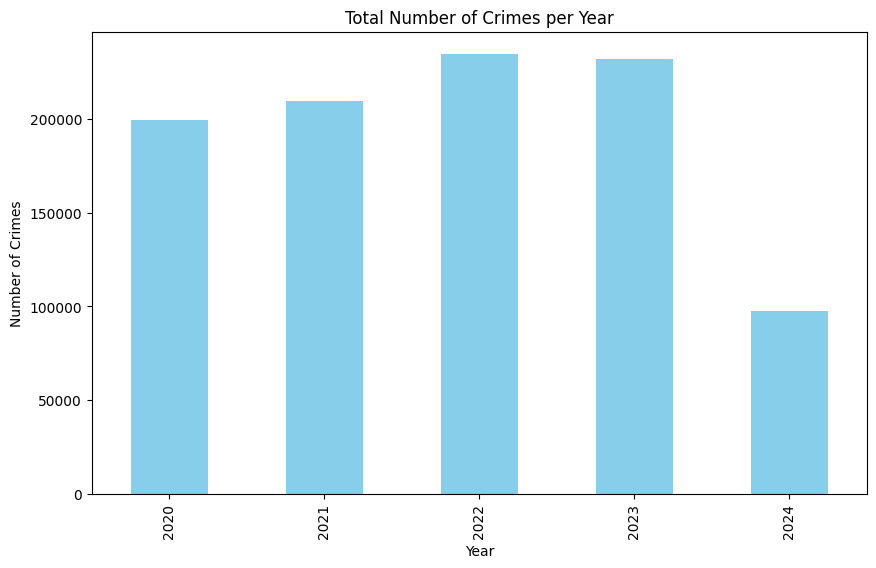

In [25]:
# EDA
# Visualize overall crime trends from 2020 to the present year
import matplotlib.pyplot as plt
clean_crimeDataFrame['DATE OCC'] = pd.to_datetime(clean_crimeDataFrame['DATE OCC'])
clean_crimeDataFrame['Year'] = clean_crimeDataFrame['DATE OCC'].dt.year
total_crimes_per_year = clean_crimeDataFrame['Year'].value_counts().sort_index()

# Plot the total number of crimes per year
plt.figure(figsize=(10,6))
total_crimes_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

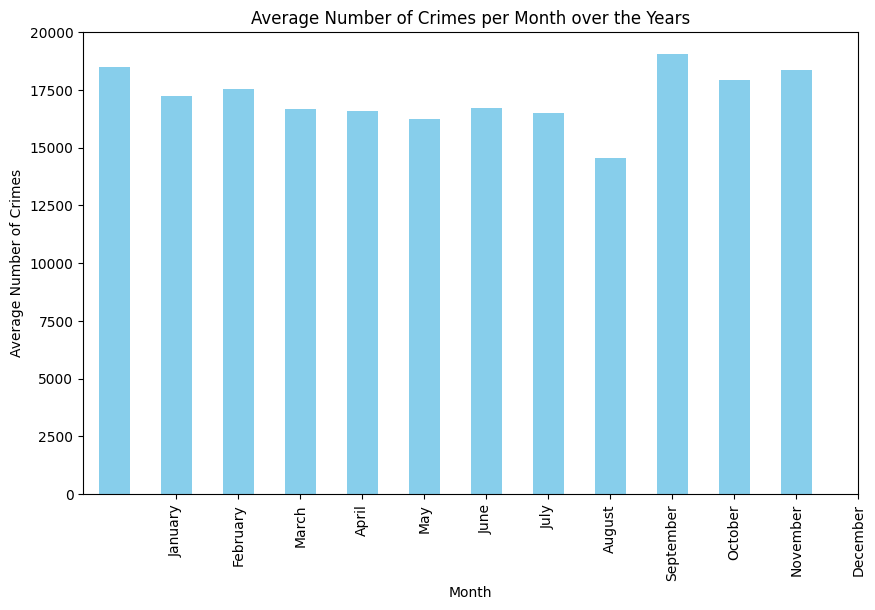

In [26]:
# Analyze and visualize seasonal patterns in crime data
clean_crimeDataFrame['YEAR'] =clean_crimeDataFrame['DATE OCC'].dt.year
clean_crimeDataFrame['MONTH'] = clean_crimeDataFrame['DATE OCC'].dt.month

# Group the data by month and year and calculate the average number of crimes per month over the years
average_crimes_per_month = clean_crimeDataFrame.groupby(['YEAR', 'MONTH']).size().groupby('MONTH').mean()

# Plot the average number of crimes per month over the years
plt.figure(figsize=(10,6))
average_crimes_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Number of Crimes per Month over the Years')
plt.xlabel('Month')
plt.ylabel('Average Number of Crimes')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

In [27]:
# Identify the most common type of crime and its trends over time
print(clean_crimeDataFrame.groupby('Crm Cd Desc')['Crm Cd Desc'].count())
#printing the frequency of crimes occured.

Crm Cd Desc
ARSON                                                        2546
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                 1068
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              53316
ATTEMPTED ROBBERY                                            4827
BATTERY - SIMPLE ASSAULT                                    74591
                                                            ...  
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     2507
VIOLATION OF COURT ORDER                                     6358
VIOLATION OF RESTRAINING ORDER                              11726
VIOLATION OF TEMPORARY RESTRAINING ORDER                      921
WEAPONS POSSESSION/BOMBING                                     41
Name: Crm Cd Desc, Length: 139, dtype: int64


In [28]:
crime_type_counts = clean_crimeDataFrame['Crm Cd Desc'].value_counts()
most_frequent_crime_type = crime_type_counts.idxmax()

print(f"The most frequent crime type is '{most_frequent_crime_type}' with {crime_type_counts[most_frequent_crime_type]} occurrences.")
top_5_crimes = crime_type_counts.head(5)
print("\nTop 5 most common crimes:")
for crime_type, count in top_5_crimes.items():
    print(f"'{crime_type}': {count} occurrences")

The most frequent crime type is 'VEHICLE - STOLEN' with 109087 occurrences.

Top 5 most common crimes:
'VEHICLE - STOLEN': 109087 occurrences
'BATTERY - SIMPLE ASSAULT': 74591 occurrences
'BURGLARY FROM VEHICLE': 60668 occurrences
'THEFT OF IDENTITY': 60258 occurrences
'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 59088 occurrences


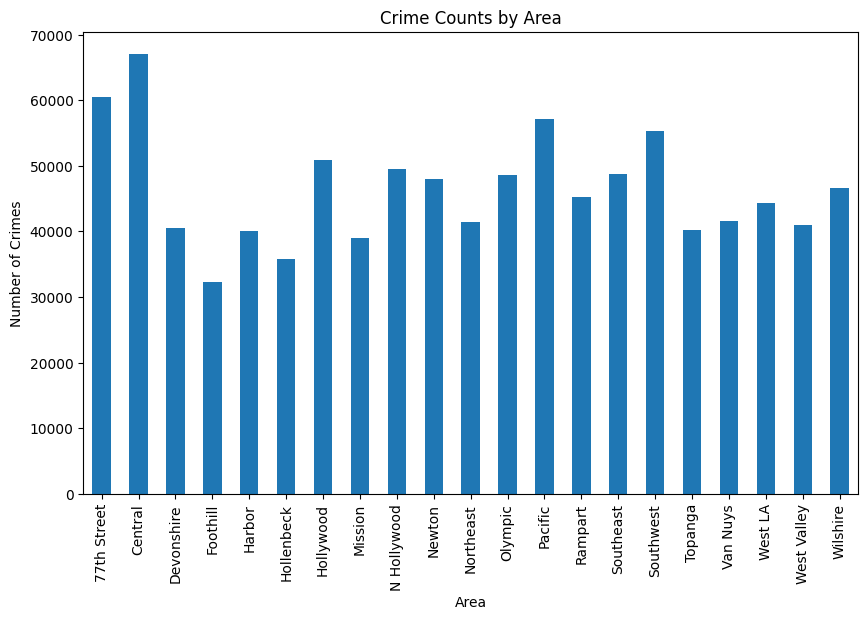

In [29]:
# Investigate if there are any notable differences in crime rates between regions or cities
import matplotlib.pyplot as plt
grp_by_city = clean_crimeDataFrame.groupby('AREA NAME')
crime_count_by_area = grp_by_city['Crm Cd Desc'].count()
crime_count_by_area.plot(kind='bar', figsize=(10, 6))
plt.title('Crime Counts by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.show()

In [31]:
crime_count_by_area.describe()


,Crm Cd Desc
count,21.000000
mean,46375.523810
std,8439.615919
min,32317.000000
25%,40444.000000
50%,45241.000000
75%,49530.000000
max,67061.000000


In [32]:
grouped_data = clean_crimeDataFrame.groupby('AREA NAME')['Crm Cd Desc'].agg([pd.Series.mode, 'count']).reset_index()
grouped_data.columns = ['AREA NAME', 'Most Common Crime', 'Crime Count']

print(grouped_data)

      AREA NAME         Most Common Crime  Crime Count
0   77th Street          VEHICLE - STOLEN        60478
1       Central     BURGLARY FROM VEHICLE        67061
2    Devonshire          VEHICLE - STOLEN        40444
3      Foothill          VEHICLE - STOLEN        32317
4        Harbor          VEHICLE - STOLEN        40137
5    Hollenbeck          VEHICLE - STOLEN        35839
6     Hollywood  BATTERY - SIMPLE ASSAULT        50925
7       Mission          VEHICLE - STOLEN        39022
8   N Hollywood          VEHICLE - STOLEN        49530
9        Newton          VEHICLE - STOLEN        47932
10    Northeast          VEHICLE - STOLEN        41465
11      Olympic          VEHICLE - STOLEN        48596
12      Pacific          VEHICLE - STOLEN        57161
13      Rampart          VEHICLE - STOLEN        45241
14    Southeast          VEHICLE - STOLEN        48790
15    Southwest          VEHICLE - STOLEN        55309
16      Topanga          VEHICLE - STOLEN        40146
17     Van

In [33]:
grouped_data

,AREA NAME,Most Common Crime,Crime Count
0,77th Street,VEHICLE - STOLEN,60478
1,Central,BURGLARY FROM VEHICLE,67061
2,Devonshire,VEHICLE - STOLEN,40444
3,Foothill,VEHICLE - STOLEN,32317
4,Harbor,VEHICLE - STOLEN,40137
5,Hollenbeck,VEHICLE - STOLEN,35839
6,Hollywood,BATTERY - SIMPLE ASSAULT,50925
7,Mission,VEHICLE - STOLEN,39022
8,N Hollywood,VEHICLE - STOLEN,49530
9,Newton,VEHICLE - STOLEN,47932


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

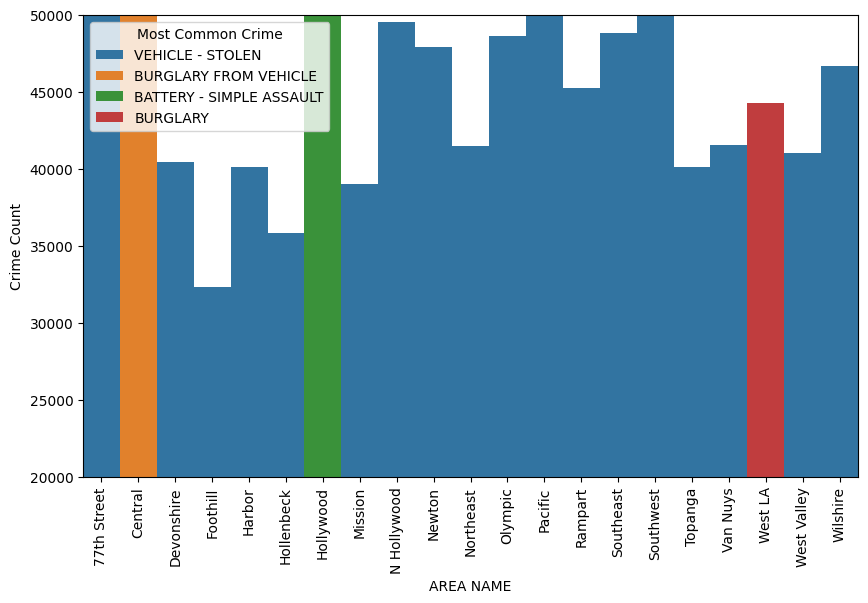

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x = 'AREA NAME',
                 y = 'Crime Count',
                 hue = 'Most Common Crime',
                 data = grouped_data,
                width = 1)

ax.set_ylim(20000, 50000)
plt.show()

In [36]:
# Explore correlations between economic factors (if available) and crime rates
import pandas as pd
economic_df = pd.read_csv("/content/drive/MyDrive/crime_data/Crime_Data_from_2020_to_Present.csv")
economic_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.000000,984.192724,991.21875,1900 S LONGWOOD AV,BROADWAY,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.000000,984.192724,991.21875,1000 S FLOWER ST,BROADWAY,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,958.139311,984.192724,991.21875,1400 W 37TH ST,BROADWAY,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,958.139311,984.192724,991.21875,14000 RIVERSIDE DR,BROADWAY,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,958.139311,984.192724,991.21875,1900 TRANSIENT,BROADWAY,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973881,240710284,2024-07-24,2024-07-23,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,958.139311,984.192724,991.21875,4000 W 23RD ST,BROADWAY,34.0362,-118.3284
973882,240104953,2024-01-15,2024-01-15,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,958.139311,984.192724,991.21875,1300 W SUNSET BL,BROADWAY,34.0685,-118.2460
973883,241711348,2024-07-19,2024-07-19,757,17,Devonshire,1751,2,888,TRESPASSING,...,IC,Invest Cont,888.0,958.139311,984.192724,991.21875,10000 OLD DEPOT PLAZA RD,BROADWAY,34.2500,-118.5990
973884,240309674,2024-04-24,2024-04-24,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,958.139311,984.192724,991.21875,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [37]:
# Analyze the relationship between the day of the week and the frequency of certain types of crimes
clean_crimeDataFrame['day_of_week'] = clean_crimeDataFrame['DATE OCC'].dt.day_name()
crimerate = clean_crimeDataFrame['day_of_week'].value_counts()
crimerate

,count
day_of_week,
Friday,148760
Saturday,142816
Wednesday,138442
Monday,137366
Thursday,137366
Sunday,135411
Tuesday,133725


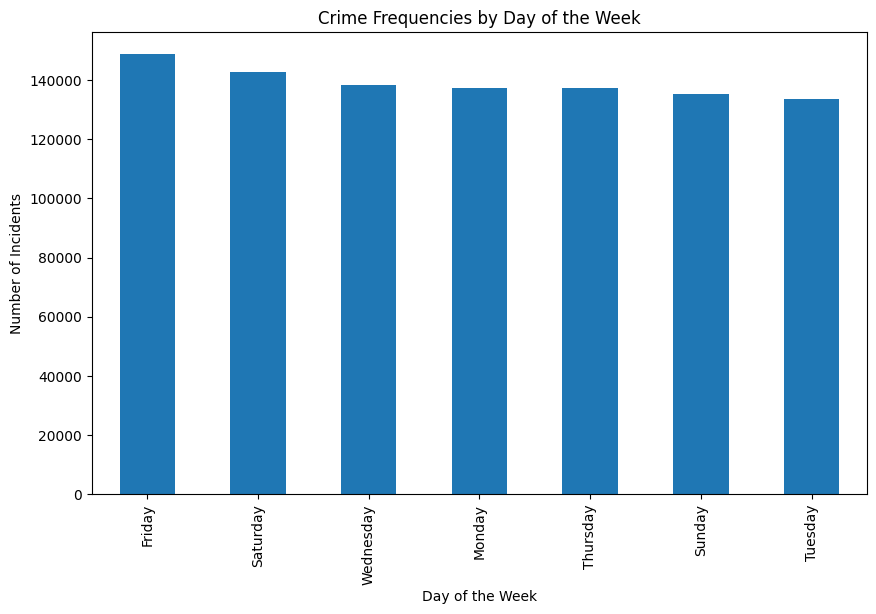

In [38]:
crimerate.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.title('Crime Frequencies by Day of the Week')
plt.show()

In [39]:
# Investigate any impact of significant events or policy changes on crime rates.
print("Timeframe of crimes reported:",max(clean_crimeDataFrame["Date Rptd"]),"-",min(clean_crimeDataFrame["Date Rptd"]))


Timeframe of crimes reported: 2024-09-02 00:00:00 - 2020-01-01 00:00:00


In [40]:
print("Timeframe of crimes occurance:",max(clean_crimeDataFrame["DATE OCC"]),"-",min(clean_crimeDataFrame["DATE OCC"]))


Timeframe of crimes occurance: 2024-09-02 00:00:00 - 2020-01-01 00:00:00


In [41]:
clean_crimeDataFrame["YEAR"]=clean_crimeDataFrame["DATE OCC"].dt.year
clean_crimeDataFrame["MONTH"]=clean_crimeDataFrame["DATE OCC"].dt.month

In [42]:
Year2020=clean_crimeDataFrame[clean_crimeDataFrame["DATE OCC"].dt.year==2020]
Year2021=clean_crimeDataFrame[clean_crimeDataFrame["DATE OCC"].dt.year==2021]
Year2022=clean_crimeDataFrame[clean_crimeDataFrame["DATE OCC"].dt.year==2022]
Year2023=clean_crimeDataFrame[clean_crimeDataFrame["DATE OCC"].dt.year==2023]

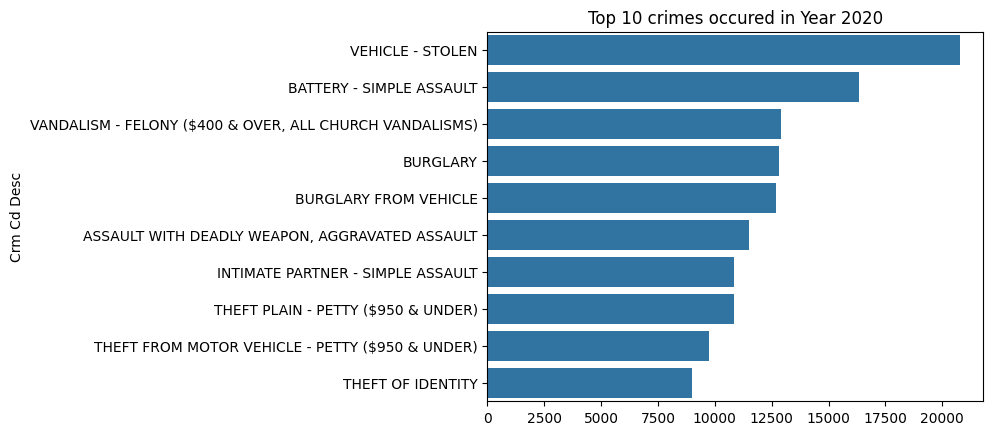

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 crime descriptions and their counts
top_10_crimes = Year2020["Crm Cd Desc"].value_counts().head(10)

# Create the bar plot
plot1 = sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index) # Pass values and index of top_10_crimes
plt.title("Top 10 crimes occured in Year 2020")
plt.show() # Display the plot

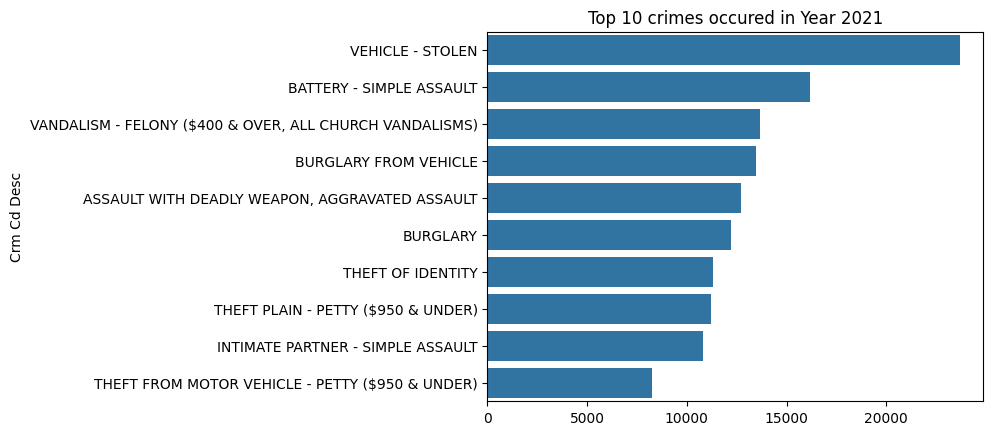

In [46]:
# Get the top 10 crime descriptions and their counts
top_10_crimes = Year2021["Crm Cd Desc"].value_counts().head(10)

# Create the bar plot
plot1 = sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index) # Pass values and index of top_10_crimes
plt.title("Top 10 crimes occured in Year 2021")
plt.show() # Display the plot

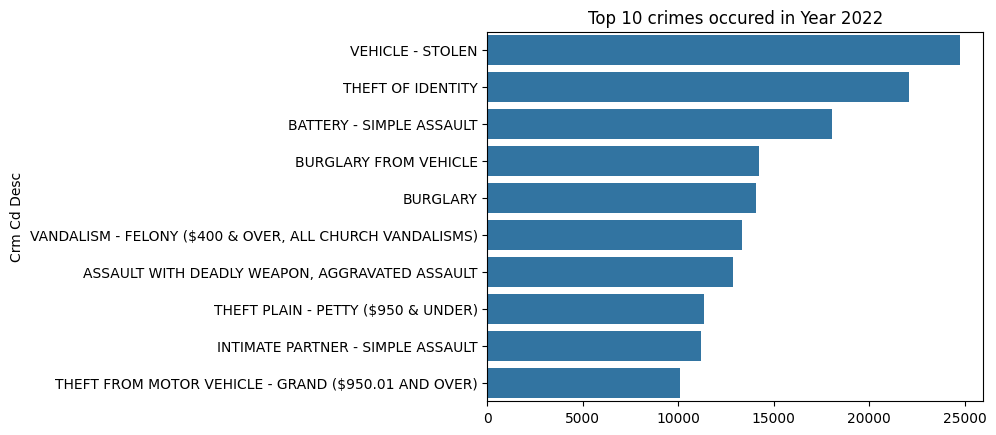

In [47]:
# Get the top 10 crime descriptions and their counts
top_10_crimes = Year2022["Crm Cd Desc"].value_counts().head(10)

# Create the bar plot
plot1 = sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index) # Pass values and index of top_10_crimes
plt.title("Top 10 crimes occured in Year 2022")
plt.show() # Display the plot

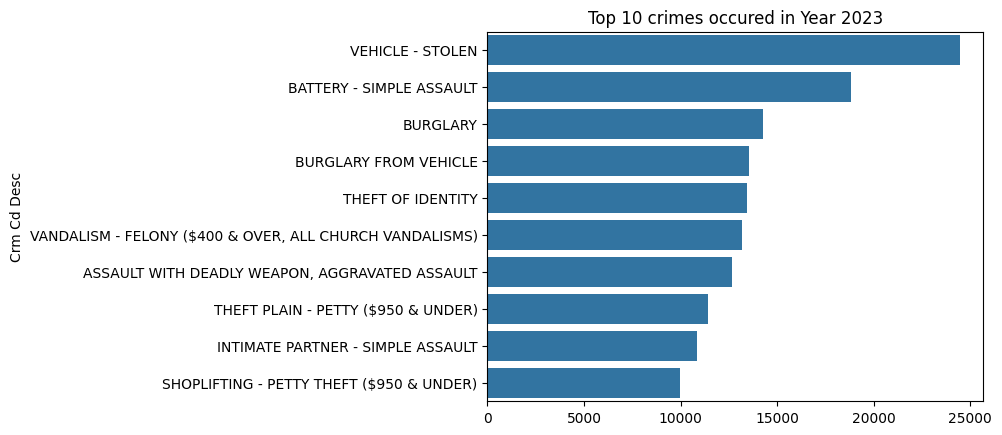

In [48]:
# Get the top 10 crime descriptions and their counts
top_10_crimes = Year2023["Crm Cd Desc"].value_counts().head(10)

# Create the bar plot
plot1 = sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index) # Pass values and index of top_10_crimes
plt.title("Top 10 crimes occured in Year 2023")
plt.show() # Display the plot

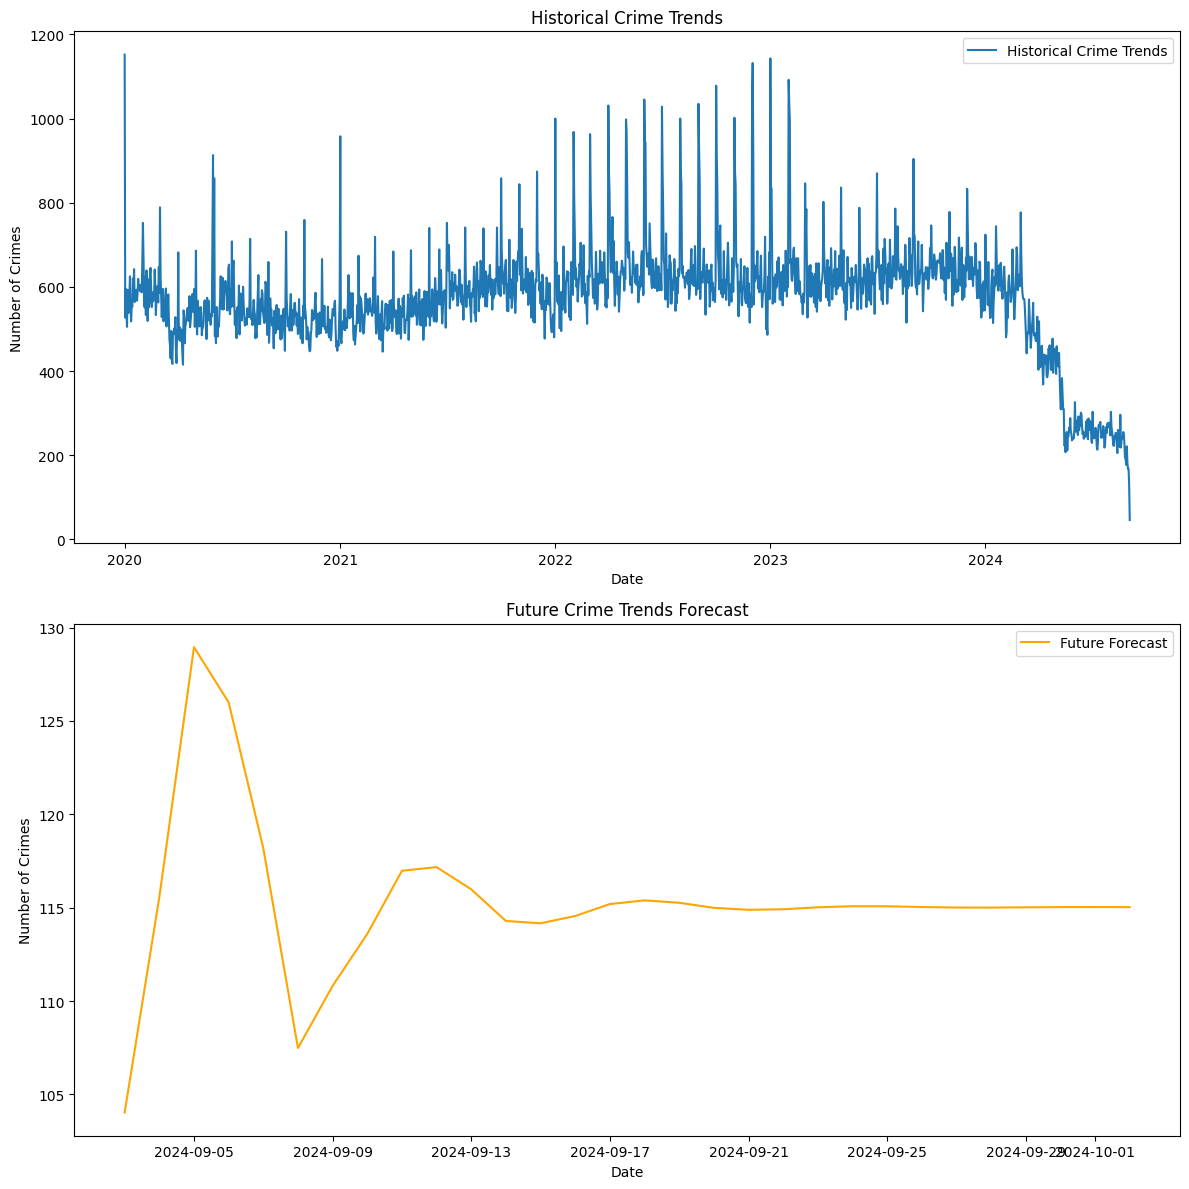

In [49]:
# Advanced Analysis
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

clean_crimeDataFrame['DATE OCC'] = pd.to_datetime(clean_crimeDataFrame['DATE OCC'])

crime_series = clean_crimeDataFrame.resample('D', on='DATE OCC').size()

# Fitting the ARIMA model
model = ARIMA(crime_series, order=(5, 1, 0))
model_fit = model.fit()

# Forecasting future crimes for the next 30 days
future_forecast = model_fit.forecast(steps=30)

# Plotting historical crime trends
plt.figure(figsize=(12, 12))

# Plotting historical data
plt.subplot(2, 1, 1)
plt.plot(crime_series, label='Historical Crime Trends')
plt.title('Historical Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()

# Plotting future forecast
plt.subplot(2, 1, 2)
plt.plot(pd.date_range(start=crime_series.index.max(), periods=31)[1:], future_forecast, label='Future Forecast', color='orange')
plt.title('Future Crime Trends Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()

plt.tight_layout()
plt.show()